# 

_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [30]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Air Quality Prediction</div>

<div class="usecase-authors"><b>Authored by: </b> Tharusha Cao</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Machine Learning</div>
</div>

<div class="usecase-section-header">Scenario</div>

Air pollution is one of the hot issues that attracted widespread attention from urban and society management. Air quality prediction is to issue an alarm when severe pollution occurs, or pollution concentration exceeds a specific limit, contributing to the measure-taking of relevant departments this is also may be due to development activity, guiding urban socio-economic activities to promote sustainable urban development.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- python
- Machine Learning
- Deep Learning
- Data Analysis and visualization skills

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

import requests
import pandas as pd

# Function that extracts the data from the JSON 
def get_data(base, data_url, offset = 0):
    
    filters = f'records?limit={100}&offset={offset}&timezone=UTC'
    url = f'{base}{data_url}/{filters}'
    result = requests.get(url)
    # if you need to extract more than 9900 records, enter the api key like below
    #result = requests.get(url + f'&apikey={API_KEY}')
    result_json = result.json()
    max_results = result_json['total_count']
    links = result_json['links']
    records = result_json['records']
    records_df = pd.json_normalize(records)
    
    # fix columns names
    records_df.drop(columns=['links'],inplace=True)
    column_names = records_df.columns.values.tolist()
    
    column_names = [i.split('.')[-1] for i in column_names]
    records_df.columns = column_names
    
    next_url = None
    
    # get next url
    if records_df.shape[0] != max_results:
        for l in links:
            if l['rel']=='next':
                next_url = l['href']
                
    return [records_df, next_url, column_names]

# Code

Note the "Discussion" sections are displayed under relevant code outputs.

### Fetching Data ###

In [52]:
###################################################################
# Libraries used:
###################################################################
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import requests
import math
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
f = open("API.txt","r")
api_key = f.read()

In [3]:
#Using API
# **Preferred Method**: Export Endpoint
import requests
import pandas as pd
from io import StringIO

# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id_1 = 'argyle-square-air-quality'
dataset_id_2 = 'development-activity-monitor'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey = api_key
dataset_id_1 = dataset_id_1
format = 'csv'

url = f'{base_url}{dataset_id_1}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_hour = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian_hour.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

                             time    dev_id           sensor_name  \
23048   2022-06-07T23:50:04+00:00  ems-ec8a  Air Quality Sensor 2   
2197    2020-07-08T15:02:28+00:00  ems-ce10  Air Quality Sensor 1   
59519   2021-08-19T13:36:14+00:00  ems-ce10  Air Quality Sensor 1   
79648   2021-04-18T04:00:18+00:00  ems-ce10  Air Quality Sensor 1   
121658  2022-11-29T11:30:13+00:00  ems-ec8a  Air Quality Sensor 2   
124944  2023-01-02T00:32:19+00:00  ems-ec8a  Air Quality Sensor 2   
37229   2020-08-24T11:39:50+00:00  ems-ce10  Air Quality Sensor 1   
36599   2021-12-20T20:36:03+00:00  ems-ec8a  Air Quality Sensor 2   
68429   2021-03-08T02:37:13+00:00  ems-ce10  Air Quality Sensor 1   
47248   2021-09-09T01:45:26+00:00  ems-ec8a  Air Quality Sensor 2   

                       lat_long  averagespl  carbonmonoxide  humidity  ibatt  \
23048   -37.802772, 144.9655513        58.0         -7384.0      85.0    0.0   
2197    -37.802772, 144.9655513        58.0         -2717.0      95.0  124.0   


In [4]:
#Convert to Function 

def API_Unlimited(datasetname,apikey): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))

#Test 
Dataset_1 = "argyle-square-air-quality"
DatasetOne = API_Unlimited(Dataset_1,api_key)

"""
Get unlimited data from the API Function 

Parameters:
datasetname (string): dataset name as from city of melbourn 
apikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)

f = open("API.txt","r")
api_key = f.read()

Returns:
Csv : Returns the csv dataset of the dataset name 
"""


                             time    dev_id           sensor_name  \
23048   2022-06-07T23:50:04+00:00  ems-ec8a  Air Quality Sensor 2   
2197    2020-07-08T15:02:28+00:00  ems-ce10  Air Quality Sensor 1   
59519   2021-08-19T13:36:14+00:00  ems-ce10  Air Quality Sensor 1   
79648   2021-04-18T04:00:18+00:00  ems-ce10  Air Quality Sensor 1   
121658  2022-11-29T11:30:13+00:00  ems-ec8a  Air Quality Sensor 2   
124944  2023-01-02T00:32:19+00:00  ems-ec8a  Air Quality Sensor 2   
37229   2020-08-24T11:39:50+00:00  ems-ce10  Air Quality Sensor 1   
36599   2021-12-20T20:36:03+00:00  ems-ec8a  Air Quality Sensor 2   
68429   2021-03-08T02:37:13+00:00  ems-ce10  Air Quality Sensor 1   
47248   2021-09-09T01:45:26+00:00  ems-ec8a  Air Quality Sensor 2   

                       lat_long  averagespl  carbonmonoxide  humidity  ibatt  \
23048   -37.802772, 144.9655513        58.0         -7384.0      85.0    0.0   
2197    -37.802772, 144.9655513        58.0         -2717.0      95.0  124.0   


'\nGet unlimited data from the API Function \n\nParameters:\ndatasetname (string): dataset name as from city of melbourn \napikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)\n\nf = open("API.txt","r")\napi_key = f.read()\n\nReturns:\nCsv : Returns the csv dataset of the dataset name \n'

In [5]:
num_records = len(DatasetOne)
print(f'The dataset contains {num_records} records.')

The dataset contains 140437 records.


In [6]:
ArgyleSquareAirQuality = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/argyle-square-air-quality/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
DevelopmentActivityMonitor ="https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/development-activity-monitor/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
AirQuality_df = pd.read_csv(ArgyleSquareAirQuality)
ActivityMonitor_df = pd.read_csv(DevelopmentActivityMonitor)


In [7]:
pd.set_option('display.max_columns', None)
AirQuality_df.head()

,date_measure,dev_id,Sensor Name,Lat Long,averageSpl,carbonMonoxide,humidity,iBatt,nitrogenDioxide,ozone,particulatesErr,particulatesVsn,peakSpl,pm1,pm10,pm25,temperature,vBatt,vPanel
0,2022-05-04T07:46:34+10:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
1,2021-05-15T16:04:33+10:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33
2,2021-05-15T16:10:49+10:00,ems-ce10,Air Quality Sensor 1,"-37.802772, 144.9655513",70.0,-2887.0,61.0,132.0,123.0,-13.0,0.0,151.0,87.0,0.0,0.0,0.0,13.2,3.90,16.03
3,2021-05-15T17:49:32+10:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6822.0,59.0,98.0,306.0,147.0,0.0,151.0,60.0,0.0,1.0,1.0,12.7,3.95,0.00
4,2021-05-15T19:19:32+10:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",57.0,-6822.0,63.0,109.0,306.0,142.0,0.0,151.0,65.0,2.0,5.0,3.0,12.1,3.93,0.00


### Pre-Proccessing Data ###
##### This section will consist of pre-processing the data sets such as removing unnecessary columns, Filling missing values , Normalization, Encoding and more to help make the data usefull for machine learning and deep learning 

In [8]:
# Removing Uneccerrary columns which wont be any use for data analysis
#From the Air Quality we will be using carbonMonoxide as the Target Feature 
Droping_Features_AirQuality = ['vPanel','vBatt','pm25','pm10','pm1','peakSpl','iBatt','averageSpl','Sensor Name','dev_id']
AirQuality_df = AirQuality_df.drop(columns=Droping_Features_AirQuality)

In [9]:
AirQuality_df.head()

,date_measure,Lat Long,carbonMonoxide,humidity,nitrogenDioxide,ozone,particulatesErr,particulatesVsn,temperature
0,2022-05-04T07:46:34+10:00,"-37.802772, 144.9655513",-6261.0,77.0,268.0,137.0,0.0,151.0,15.1
1,2021-05-15T16:04:33+10:00,"-37.802772, 144.9655513",-6261.0,51.0,258.0,119.0,0.0,151.0,14.9
2,2021-05-15T16:10:49+10:00,"-37.802772, 144.9655513",-2887.0,61.0,123.0,-13.0,0.0,151.0,13.2
3,2021-05-15T17:49:32+10:00,"-37.802772, 144.9655513",-6822.0,59.0,306.0,147.0,0.0,151.0,12.7
4,2021-05-15T19:19:32+10:00,"-37.802772, 144.9655513",-6822.0,63.0,306.0,142.0,0.0,151.0,12.1


#### In this first part we will be trying to predict future AirQuality in Argyle Square, The features used :


##### 1. date_measure - Important component as we need to recognize the change in the pattern
##### 2. Lat Long - Currently only needed for part 2
##### 3. carbonMonoxide - This is the Target for this part, we need to find the carbonMonoxide value for future Dates
##### 4. humidity - Training with corelation
##### 5. nitrogenDioxide - Training with corelation
##### 6. ozone - Training with corelation
##### 7. temperature - Training with corelation
##### 8. particulatesErr - Will be used in Part 2
##### 9. particulatesVsn - Will be used in Part 2

In [10]:
#Checking for empty data 
missing_values = AirQuality_df.isnull().sum()
print("--------------------------Current Missing Values --------------------------")
print(missing_values)


#Lets see propotion
missing_proportion = (missing_values / len(AirQuality_df))*100
print("--------------------------Current Missing Values Propotion --------------------------")
print(missing_proportion)

#Function to call 
def FindMissingVal(df):
  #now lets have a array to store the feature with number of NAN values
  MissingFeaturenValues = []
  #now we check each column
  for column in df.columns:
    missingVals = np.sum(df[column].isnull()) # sum the number of NAN values into variable
    MissingFeaturenValues.append({'Feature':column ,'Number of Missing Values':missingVals}) #the array consist of dictionary with feature and its missing values
  return MissingFeaturenValues


--------------------------Current Missing Values --------------------------
date_measure          0
Lat Long              0
carbonMonoxide     9792
humidity           9792
nitrogenDioxide    9792
ozone              9792
particulatesErr    9792
particulatesVsn    9792
temperature        9792
dtype: int64
--------------------------Current Missing Values Propotion --------------------------
date_measure       0.000000
Lat Long           0.000000
carbonMonoxide     6.972521
humidity           6.972521
nitrogenDioxide    6.972521
ozone              6.972521
particulatesErr    6.972521
particulatesVsn    6.972521
temperature        6.972521
dtype: float64


##### We can see that there are around 9765 missing values for the Above and We can see that the proportion is 6.993583% of 139629 data points in Aquality Data set 
##### I will be filling the missing values with the mean 

In [11]:
AirQuality_df_copy = AirQuality_df.copy()
for item in FindMissingVal(AirQuality_df):
    if item['Number of Missing Values'] != 0 : # get the number of missing values > 0 we will use mean
        name = item['Feature'] # each column
        print(name + " : Has been replaced with its mean")
        AirQuality_df_copy[name].fillna(value=AirQuality_df[name].mean(), inplace=True) 

carbonMonoxide : Has been replaced with its mean
humidity : Has been replaced with its mean
nitrogenDioxide : Has been replaced with its mean
ozone : Has been replaced with its mean
particulatesErr : Has been replaced with its mean
particulatesVsn : Has been replaced with its mean
temperature : Has been replaced with its mean


C:\Users\tharu\AppData\Local\Temp\ipykernel_2832\327400964.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  AirQuality_df_copy[name].fillna(value=AirQuality_df[name].mean(), inplace=True)


In [12]:
AirQuality_df_copy.isnull().sum()

date_measure       0
Lat Long           0
carbonMonoxide     0
humidity           0
nitrogenDioxide    0
ozone              0
particulatesErr    0
particulatesVsn    0
temperature        0
dtype: int64

In [13]:
AirQuality_df_copy.head()

,date_measure,Lat Long,carbonMonoxide,humidity,nitrogenDioxide,ozone,particulatesErr,particulatesVsn,temperature
0,2022-05-04T07:46:34+10:00,"-37.802772, 144.9655513",-6261.0,77.0,268.0,137.0,0.0,151.0,15.1
1,2021-05-15T16:04:33+10:00,"-37.802772, 144.9655513",-6261.0,51.0,258.0,119.0,0.0,151.0,14.9
2,2021-05-15T16:10:49+10:00,"-37.802772, 144.9655513",-2887.0,61.0,123.0,-13.0,0.0,151.0,13.2
3,2021-05-15T17:49:32+10:00,"-37.802772, 144.9655513",-6822.0,59.0,306.0,147.0,0.0,151.0,12.7
4,2021-05-15T19:19:32+10:00,"-37.802772, 144.9655513",-6822.0,63.0,306.0,142.0,0.0,151.0,12.1


#### Date Time column needs to be standardized and Lat / Long also needs to be split (Not sure i need right now , i probably will.


In [14]:
# Convert 'date_measure' to datetime remove any incontencies 
AirQuality_df_copy['date_measure'] = pd.to_datetime(AirQuality_df_copy['date_measure'], utc=True)


# Split 'Lat/Long' into two separate columns and convert to float
AirQuality_df_copy[['latitude', 'longitude']] = AirQuality_df_copy['Lat Long'].str.split(', ', expand=True).astype(float)
# Drop the original 'Lat Long' column
AirQuality_df_copy = AirQuality_df_copy.drop(columns=['Lat Long'])

AirQuality_df_copy.head()

,date_measure,carbonMonoxide,humidity,nitrogenDioxide,ozone,particulatesErr,particulatesVsn,temperature,latitude,longitude
0,2022-05-03 21:46:34+00:00,-6261.0,77.0,268.0,137.0,0.0,151.0,15.1,-37.802772,144.965551
1,2021-05-15 06:04:33+00:00,-6261.0,51.0,258.0,119.0,0.0,151.0,14.9,-37.802772,144.965551
2,2021-05-15 06:10:49+00:00,-2887.0,61.0,123.0,-13.0,0.0,151.0,13.2,-37.802772,144.965551
3,2021-05-15 07:49:32+00:00,-6822.0,59.0,306.0,147.0,0.0,151.0,12.7,-37.802772,144.965551
4,2021-05-15 09:19:32+00:00,-6822.0,63.0,306.0,142.0,0.0,151.0,12.1,-37.802772,144.965551


In [15]:
# Lets add normalization - Since the data has a large gap for each feature normalization would help
#Using Standard Scaling 
#We dont need norms for date_measure,latitude,longitude
AirQuality_df_copy_Normalized = AirQuality_df_copy.copy()
data_float_columns =['carbonMonoxide','humidity','nitrogenDioxide','ozone','particulatesErr','particulatesVsn','temperature']

scaler = StandardScaler()
AirQuality_df_copy_Normalized[data_float_columns] = scaler.fit_transform(AirQuality_df_copy[data_float_columns])

AirQuality_df_copy_Normalized.head(), AirQuality_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140437 entries, 0 to 140436
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   date_measure     140437 non-null  datetime64[ns, UTC]
 1   carbonMonoxide   140437 non-null  float64            
 2   humidity         140437 non-null  float64            
 3   nitrogenDioxide  140437 non-null  float64            
 4   ozone            140437 non-null  float64            
 5   particulatesErr  140437 non-null  float64            
 6   particulatesVsn  140437 non-null  float64            
 7   temperature      140437 non-null  float64            
 8   latitude         140437 non-null  float64            
 9   longitude        140437 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(9)
memory usage: 10.7 MB


(               date_measure  carbonMonoxide  humidity  nitrogenDioxide  \
 0 2022-05-03 21:46:34+00:00       -0.806450  0.324402         0.594771   
 1 2021-05-15 06:04:33+00:00       -0.806450 -1.480891         0.498806   
 2 2021-05-15 06:10:49+00:00        0.852223 -0.786548        -0.796721   
 3 2021-05-15 07:49:32+00:00       -1.082240 -0.925416         0.959438   
 4 2021-05-15 09:19:32+00:00       -1.082240 -0.647679         0.959438   
 
       ozone  particulatesErr  particulatesVsn  temperature   latitude  \
 0  0.810347        -0.002868         0.182278    -0.308031 -37.802772   
 1  0.563830        -0.002868         0.182278    -0.345241 -37.802772   
 2 -1.243962        -0.002868         0.182278    -0.661524 -37.802772   
 3  0.947301        -0.002868         0.182278    -0.754549 -37.802772   
 4  0.878824        -0.002868         0.182278    -0.866178 -37.802772   
 
     longitude  
 0  144.965551  
 1  144.965551  
 2  144.965551  
 3  144.965551  
 4  144.965551  ,

-------------- View BEFORE SCALING-----------------


<Figure size 1000x1000 with 0 Axes>

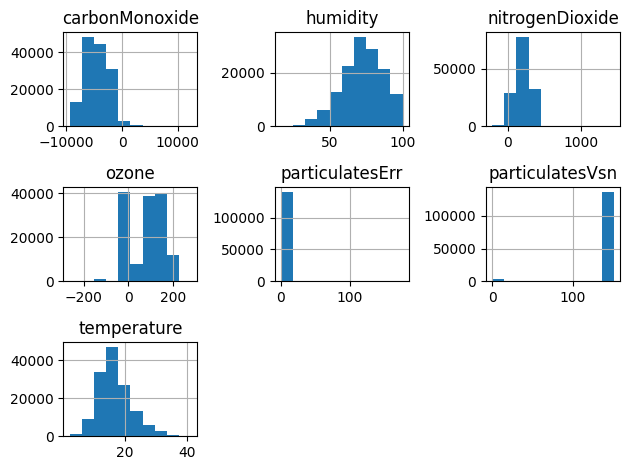

-------------- View AFTER SCALING-----------------


<Figure size 1000x1000 with 0 Axes>

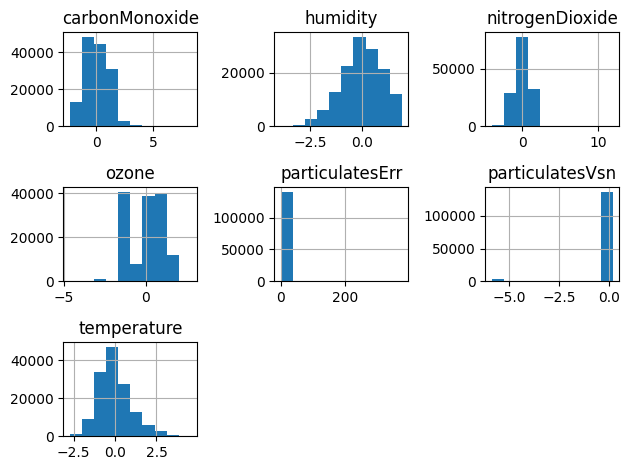

In [16]:
#Lets see the scaling before and after
print("-------------- View BEFORE SCALING-----------------")
plt.figure(figsize=(10, 10))
AirQuality_df_copy[data_float_columns].hist()
plt.tight_layout()
plt.show()


print("-------------- View AFTER SCALING-----------------")
plt.figure(figsize=(10, 10))
AirQuality_df_copy_Normalized[data_float_columns].hist()
plt.tight_layout()
plt.show()

### Now we check the Development Activity Monitor DataSet

In [17]:
ActivityMonitor_df.head()

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,property_id_4,property_id_5,floors_above,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments,student_beds,student_accommodation_units,institutional_accom_beds,hotel_rooms,serviced_apartments,hotels_serviced_apartments,hostel_beds,childcare_places,office_flr,retail_flr,industrial_flr,storage_flr,education_flr,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000568,COMPLETED,2012.0,West Melbourne (Residential),411,1-13 Abbotsford Street WEST MELBOURNE VIC 3003,100001,NaN,NaN,NaN,NaN,3,10,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.943280,-37.807920,"-37.80791988, 144.9432805"
1,Pre May 16,X000557,COMPLETED,2002.0,West Melbourne (Residential),401,7-21 Anderson Street WEST MELBOURNE VIC 3003,100435,NaN,NaN,NaN,NaN,5,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.941547,-37.804777,"-37.80477682, 144.9415469"
2,Pre May 16,X000448,COMPLETED,2015.0,North Melbourne,314,302-308 Arden Street NORTH MELBOURNE VIC 3051,100509,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1064,0,0,0,0,0,0,24,6,0,144.937724,-37.799250,"-37.79925034, 144.9377236"
3,Pre May 16,X000458,COMPLETED,2004.0,North Melbourne,330,162-168 Arden Street NORTH MELBOURNE VIC 3051,100519,NaN,NaN,NaN,NaN,2,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.946228,-37.800320,"-37.80032041, 144.9462277"
4,Pre May 16,X000996,COMPLETED,2013.0,North Melbourne,1012,201 Arden Street NORTH MELBOURNE VIC 3051,100552,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.941047,-37.800299,"-37.80029861, 144.9410467"


In [18]:
column_names = list(ActivityMonitor_df.columns.values)
column_names

['data_format',
 'development_key',
 'status',
 'year_completed',
 'clue_small_area',
 'clue_block',
 'street_address',
 'property_id',
 'property_id_2',
 'property_id_3',
 'property_id_4',
 'property_id_5',
 'floors_above',
 'resi_dwellings',
 'studio_dwe',
 'one_bdrm_dwe',
 'two_bdrm_dwe',
 'three_bdrm_dwe',
 'student_apartments',
 'student_beds',
 'student_accommodation_units',
 'institutional_accom_beds',
 'hotel_rooms',
 'serviced_apartments',
 'hotels_serviced_apartments',
 'hostel_beds',
 'childcare_places',
 'office_flr',
 'retail_flr',
 'industrial_flr',
 'storage_flr',
 'education_flr',
 'hospital_flr',
 'recreation_flr',
 'publicdispaly_flr',
 'community_flr',
 'car_spaces',
 'bike_spaces',
 'town_planning_application',
 'longitude',
 'latitude',
 'geopoint']

In [19]:
# Removing Uneccerrary columns which wont be any use for data analysis
#From the Air Quality we will be using carbonMonoxide as the Target Feature 

# my main focus by using this data is to see if a building built in the radius od the air pollution sensor location effected the air pollution and see the '
#relatioonship , hence we can drop all the features expect the geolocation, date (year) , and status 

#for we can also see which types of buildings contribute to air pollution more later in , for now lets drop them and copy to new DF
Droping_Features_ActivityMonitor = ['data_format','development_key','clue_small_area','clue_block','street_address','property_id',
 'property_id_2','property_id_3','property_id_4','property_id_5','floors_above','resi_dwellings','studio_dwe','one_bdrm_dwe','two_bdrm_dwe','three_bdrm_dwe','student_apartments',
 'student_beds','student_accommodation_units','institutional_accom_beds','hotel_rooms','serviced_apartments','hotels_serviced_apartments','hostel_beds','childcare_places','office_flr',
 'retail_flr','industrial_flr','storage_flr','education_flr','hospital_flr','recreation_flr','publicdispaly_flr','community_flr','car_spaces',
 'bike_spaces','town_planning_application','geopoint']

ActivityMonitor_df_Dropped = ActivityMonitor_df.copy()

ActivityMonitor_df_Dropped = ActivityMonitor_df_Dropped.drop(columns=Droping_Features_ActivityMonitor)

In [20]:
ActivityMonitor_df_Dropped.head()

,status,year_completed,longitude,latitude
0,COMPLETED,2012.0,144.943280,-37.807920
1,COMPLETED,2002.0,144.941547,-37.804777
2,COMPLETED,2015.0,144.937724,-37.799250
3,COMPLETED,2004.0,144.946228,-37.800320
4,COMPLETED,2013.0,144.941047,-37.800299


In [21]:
ActivityMonitor_df_Dropped.shape
#1430 rows of data 

(1430, 4)

In [22]:
#calling finding missing val function 
FindMissingVal(ActivityMonitor_df_Dropped)

[{'Feature': 'status', 'Number of Missing Values': 0},
 {'Feature': 'year_completed', 'Number of Missing Values': 394},
 {'Feature': 'longitude', 'Number of Missing Values': 0},
 {'Feature': 'latitude', 'Number of Missing Values': 0}]

In [23]:
#checking propotion 
missing_values = ActivityMonitor_df_Dropped.isnull().sum()
missing_proportion = (missing_values / len(ActivityMonitor_df_Dropped))*100
print("--------------------------Current Missing Values Propotion --------------------------")
print(missing_proportion)

print("missing propotion is not that bad at 27% , we can try replacing the missing values with its mode ")

#replacing with mode :

ActivityMonitor_df_FillNA = ActivityMonitor_df_Dropped.copy()
for item in FindMissingVal(ActivityMonitor_df_Dropped):
    if item['Number of Missing Values'] != 0 : # get the number of missing values > 0 we will use mean
        name = item['Feature'] # each column
        print(name + " : Has been replaced with its mode")
        ActivityMonitor_df_FillNA[name].fillna(value=ActivityMonitor_df_Dropped[name].mode()[0], inplace=True)  # mode fill 

--------------------------Current Missing Values Propotion --------------------------
status             0.000000
year_completed    27.552448
longitude          0.000000
latitude           0.000000
dtype: float64
missing propotion is not that bad at 27% , we can try replacing the missing values with its mode 
year_completed : Has been replaced with its mode


C:\Users\tharu\AppData\Local\Temp\ipykernel_2832\270070995.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ActivityMonitor_df_FillNA[name].fillna(value=ActivityMonitor_df_Dropped[name].mode()[0], inplace=True)  # mode fill


In [24]:
ActivityMonitor_df_FillNA.head()

,status,year_completed,longitude,latitude
0,COMPLETED,2012.0,144.943280,-37.807920
1,COMPLETED,2002.0,144.941547,-37.804777
2,COMPLETED,2015.0,144.937724,-37.799250
3,COMPLETED,2004.0,144.946228,-37.800320
4,COMPLETED,2013.0,144.941047,-37.800299


In [25]:
FindMissingVal(ActivityMonitor_df_FillNA)

[{'Feature': 'status', 'Number of Missing Values': 0},
 {'Feature': 'year_completed', 'Number of Missing Values': 0},
 {'Feature': 'longitude', 'Number of Missing Values': 0},
 {'Feature': 'latitude', 'Number of Missing Values': 0}]

In [26]:
ActivityMonitor_df_FillNA.isnull().sum()

status            0
year_completed    0
longitude         0
latitude          0
dtype: int64

In [27]:
#DOES NOT NEED TO BE STANDARDIZED 
""" Probably will be needing catageroical encoding """

' Probably will be needing catageroical encoding '

#### Linear Regression
##### To start off I will be using a Baisc model of linear regression to predict future air quality in Argyle Square , later on we will look into other models more on the unsupervised side such as neural networks , classification ( which building development causes most pollution ) 

In [37]:
#make code easier , no need to rerun the top expect the library imports
AirQuality_df_copy_Normalized.to_csv(r"AirQuality_preprocessed.csv", index=False)
ActivityMonitor_df_FillNA.to_csv(r"ActivityMonitor_preprocessed.csv", index=False)

In [39]:
df1 = "AirQuality_preprocessed.csv"
df2 ="ActivityMonitor_preprocessed.csv"
Air_df = pd.read_csv(df1)
Activity_df = pd.read_csv(df2)


We can see the correlation of each feature below , i will add a heat map

In [50]:
#Finding colreation of data 
features = Air_df.drop(columns=['date_measure', 'latitude', 'longitude'])
correlation_matrix = features.corr()
correlation_matrix

,carbonMonoxide,humidity,nitrogenDioxide,ozone,particulatesErr,particulatesVsn,temperature
carbonMonoxide,1.000000,-0.407881,-0.899540,-0.938830,0.002832,0.028890,0.601200
humidity,-0.407881,1.000000,0.399524,0.248024,0.003830,-0.032461,-0.646788
nitrogenDioxide,-0.899540,0.399524,1.000000,0.888684,-0.004508,-0.018157,-0.491219
ozone,-0.938830,0.248024,0.888684,1.000000,-0.004087,-0.018217,-0.358253
particulatesErr,0.002832,0.003830,-0.004508,-0.004087,1.000000,-0.014770,-0.003106
particulatesVsn,0.028890,-0.032461,-0.018157,-0.018217,-0.014770,1.000000,0.050234
temperature,0.601200,-0.646788,-0.491219,-0.358253,-0.003106,0.050234,1.000000


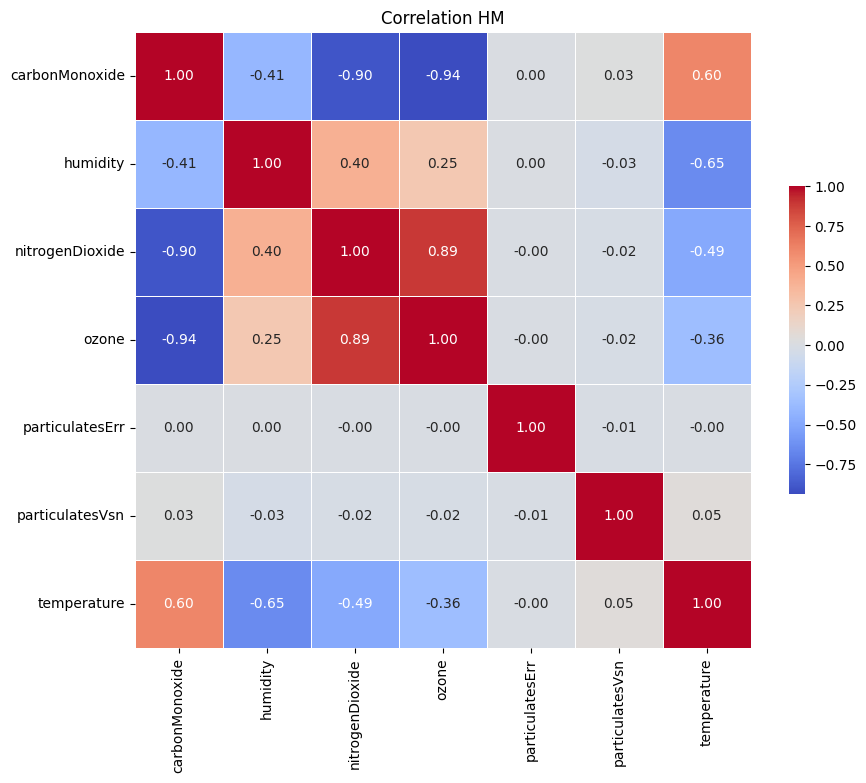

In [51]:

plt.figure(figsize=(10, 8))

#aHeat Map
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .5}, linewidths=.5)

plt.title('Correlation HM')
plt.show()


### When values are closer to 1 it indicates a positive correlation 
#### Carbon monoxide and temperature 
#### ozone and nitrogen dioxide 
#### Nitrogen dioxide  and humidity 
#### Ozone and humidity 
### When values are closer to 1 it indicates a Negative correlation 
#### Carbon monoxide and ozone 
#### Carbon monoxide and nitrogen dioxide 
#### Temperature  and humidity 
#### Carbon monoxide and humidity 

In [54]:

X = Air_df[['temperature', 'nitrogenDioxide', 'ozone']] #features we ill be using to predict the carbon monoxide 
y = Air_df['carbonMonoxide']#our target feature
#Splitting data train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

###########################################PREDICTING###############################################
y_pred = model.predict(X_test)

###########################################EVALUATION###############################################
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.04053081670235254
R-squared: 0.9597641799914981


#### Mean Squared Error (MSE) : 0.04053081670235254 is a good indication that the average of the squares of the errors between the predicted and actual carbon monoxide levels are low hence a better fit for the data
#### R-squared:  shows how well the variability in carbon monoxide levels is. value close to 1 shows a model that closely fits the data.  0.960 :  model does an very good job of showing the variance in carbon monoxide levels based on the features i trained it with.